# 3D figure

`matplotlib` works first of all for 2D figures. However, it has some methods that can create 3D figures as well. Let us look through some of them! To reach these methods, we have to load the `mpl_toolkits.mplot3d` submodule from the `matplotlib` module.

In [1]:
%pylab inline     
from mpl_toolkits.mplot3d import * #submodule for 3D figures
from ipywidgets import *  #functions for interactivity

Populating the interactive namespace from numpy and matplotlib


## Spatial curves, datasets

To be able to visualize a figure in 3D space, we have to prepare the environment for the visualization. The properties of the axes are therefore somewhat more difficult to set than in the case of 2D figures. Figures are centered around so-called `axes` objects, and the properties and methods of these objects control the figure creation. As an example, take a simple parametric curve in 3D space! The curve can be described by the following function:

\begin{equation}
\mathbf{r}(t)=\left(\begin{array}{c}
\cos(3t)\\
\sin(3t)\\
t
\end{array}\right)
\end{equation}

First, let us make the sampling points of $t$ in the interval $[0,2\pi]$.

In [2]:
t=linspace(0,2*pi,100) # 100 points between 0 and 2*pi

In the next cell, two things are going to happen. First of all, we create an `axes` object called `ax` with the `subplot` command, which we tell that the coordinate system should be 3D. Then, we create the figure by using the `plot` function on this object. Let us observe, that this `plot` function expects 3 input parameters!

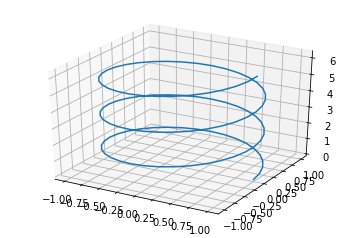

In [6]:
ax=subplot(1,1,1,projection='3d') # creating a spatial coordinate system
ax.plot(cos(3*t),sin(3*t),t)

As we have seen in the case of planar figures, the `plot` function may be used to represent unordered data as well.

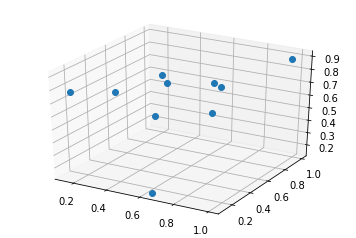

In [7]:
ax=subplot(1,1,1,projection='3d')
ax.plot(rand(10),rand(10),rand(10),'o')

Style definitions are given through keyword arguments, just as in the case of 2D figures.

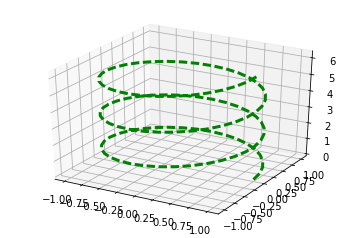

In [8]:
ax=subplot(1,1,1,projection='3d') #creating the 3D coordinate axes
ax.plot(cos(3*t),sin(3*t),t,color='green',linestyle='dashed',linewidth=3)

When creating 3D figures, it is a common problem to set the viewing angle right. This angle can be set by the `view_init` function. The two parameters of `view_init` give the viewing angles in a spherical [equatorial coordinate system](https://en.wikipedia.org/wiki/Equatorial_coordinate_system), the first being the declination, and the second the azimuth in degrees. For example, we can create a figure as viewed from the direction of the x-axis:

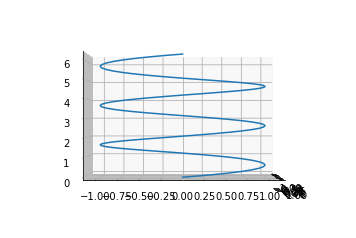

In [9]:
ax=subplot(1,1,1,projection='3d') #creating the 3D coordinate axes
ax.plot(cos(3*t),sin(3*t),t)
ax.view_init(0,0)

From the y-axis:

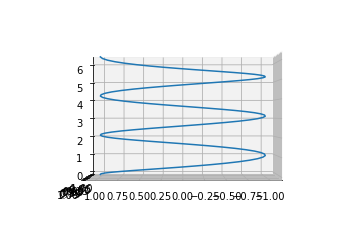

In [10]:
ax=subplot(1,1,1,projection='3d') #creating the 3D coordinate axes
ax.plot(cos(3*t),sin(3*t),t)
ax.view_init(0,90)

If we use interactive functions, we can set the viewing angles interactively:

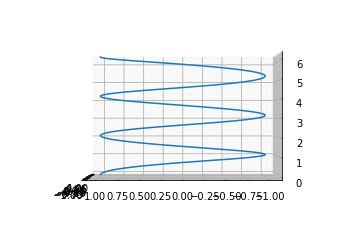

In [12]:
def rotates(th,phi):
    ax=subplot(1,1,1,projection='3d')
    ax.plot(sin(3*t),cos(3*t),t)
    ax.view_init(th,phi)

interact(rotates,th=(-90,90),phi=(0,360));

## Bivariate functions and surfaces

A great advantage of 3D figures is that we can plot surfaces. The simplest case is plotting
$$z=f(x,y)$$
bivariate functions as a height map. Again, we have to sample the $x,y$ points, then we have to evaulate our function on these points. In the following, let us plot the $$z=-[\sin(x) ^{10} + \cos(10 + y  x)  \cos(x)]\exp((-x^2-y^2)/4)$$ function!

In [13]:
x,y = meshgrid(linspace(-3,3,25),linspace(-5,5,25)) # sampling the points
z = -(sin(x) ** 10 + cos(10 + y * x) * cos(x))*exp((-x**2-y**2)/4) # evaluating the function

The `plot_surface` function displays our surface.

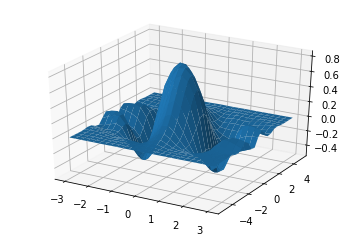

In [14]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z,rstride=1,cstride=1)

The rowwise and columnwise sampling density can be set by the `rstride` and `cstride` parameters. Their default value is 10, therefore, it is advisable to set them by hand. Here, we sample in 25-25 points in both the `x` and `y` directions, thus, with the default sampling, we get a strange figure:

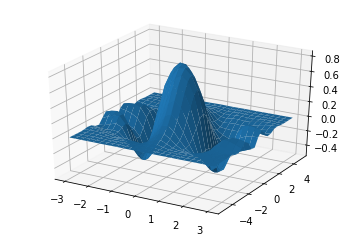

In [15]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z)

Sometimes it is useful to give a color scale to our surface. It can be done by the usual `cmap` keyword just as in the case of 2D figures.

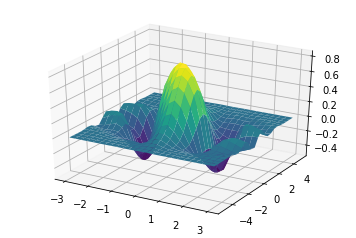

In [16]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z,rstride=1,cstride=1,cmap='viridis')

We can put a label on the `x` with the `set_xlabel` method. The `labelpad` variable of this method tunes the distance between the axis label and the axis itself. Similary, we can use the `set_ylabel` and `set_zlabel` methods for the `y` and `z` axis, respectively.

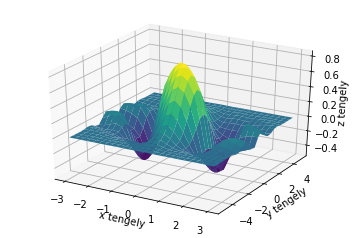

In [21]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z,rstride=1,cstride=1,cmap='viridis')
ax.set_xlabel('x axis',labelpad=-1)
ax.set_ylabel('y axis',labelpad=-1)
ax.set_zlabel('z axis',labelpad=-1)

The most general representation of surfaces can be done through bivariate vector-valued functions, such as
\begin{equation}
\mathbf{r}(u,v)=\left(\begin{array}{c}
f(u,v)\\
g(u,v)\\
h(u,v)
\end{array}\right)
\end{equation}

For example, if we would like to create a [torus](https://en.wikipedia.org/wiki/Torus), a possible parametrization is the following:

\begin{equation}
\mathbf{r}(\theta,\varphi)=\left(\begin{array}{c}
(R_1 + R_2 \cos \theta) \cos{\varphi}\\
(R_1 + R_2 \cos \theta) \sin{\varphi} \\
R_2 \sin \theta
\end{array}\right)
\end{equation}

$R_1$ and $R_2$ are the radii of the torus, $\theta$ and $\varphi$ both are from the interval $[0,2\pi]$. Let $R_1=4$ and $R_2=1$. First, let us create the points of the surface-to-be:

In [22]:
theta,phi=meshgrid(linspace(0,2*pi,25),linspace(0,2*pi,25))
x=(4 + 1*cos(theta))*cos(phi)
y=(4 + 1*cos(theta))*sin(phi) 
z=1*sin(theta)

Again, we can use the `plot_surface` function.

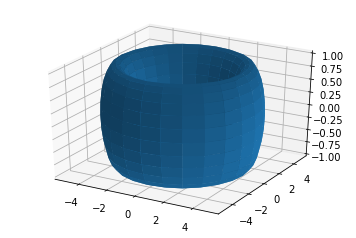

In [23]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z,rstride=1,cstride=1)

The above figure can be made more proportionate, if we set the limits of the axes and the aspect ratio. This can be done with the `set_aspect`, `set_xlim`, `set_ylim` and `set_zlim` functions.

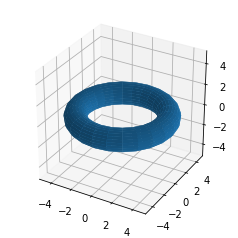

In [24]:
ax = subplot(111, projection='3d')
ax.plot_surface(x, y, z,rstride=1,cstride=1)
ax.set_aspect('equal');
ax.set_xlim(-5,5);
ax.set_ylim(-5,5);
ax.set_zlim(-5,5);

Let's make this plot interactive!

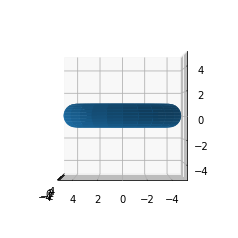

In [26]:
def rotates(th,ph):
    ax = subplot(111, projection='3d')
    ax.plot_surface(x, y, z,rstride=1,cstride=1)
    ax.view_init(th,ph)
    ax.set_aspect('equal');
    ax.set_xlim(-5,5);
    ax.set_ylim(-5,5);
    ax.set_zlim(-5,5);

interact(rotates,th=(-90,90),ph=(0,360));

Vector fields in 3D

Vector fields are functions, where we assign a 3D vector to each point of the 3D space. Similarly to the 2D case, we can do this with the `quiver` command. The next example puts a radial vector into 100 points of the unit sphere.

In [28]:
phiv,thv=(2*pi*rand(100),pi*rand(100))                    #100 random unit sphere point parameters
xv,yv,zv=(cos(phiv)*sin(thv),sin(phiv)*sin(thv),cos(thv)) #unit sphere points from the sampled parameters
uv,vv,wv=(xv,yv,zv)                                       #assigning a radial unit vector

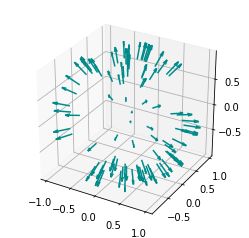

In [29]:
ax = subplot(111, projection='3d')
ax.quiver(xv, yv, zv, uv, vv, wv, length=0.3,color='darkcyan')
ax.set_aspect('equal')